# Regresión Lineal

$$
\hat{y_i} = \sum_{j=1}^p x_{ij} w_j + w_0 + \varepsilon_i
$$

y

$$
\varepsilon_i \stackrel{\text{iid}}{\sim} \mathcal{N}(0, \sigma^2)
$$

donde:
- $i$ es el índice de la observación i-ésima.
- $j$ es el índice del feature j-ésimo.
- $y_i$ es la respuesta para la $\textbf{variable target}$ en la i-ésima muestra.
- $p$ es el número de features.
- $x_{ij}$ es el valor de la i-ésima observación y j-ésimo feature ($\textbf{variable feature}$).
- $w_0$ es el bias o intercepto global.
- $w_j$ es el coeficiente o peso para el feature j-ésimo.
- $\varepsilon_i$ es el ruido para la observación i-ésima.

## (1) Abordemos $\varepsilon_i \stackrel{\text{iid}}{\sim} \mathcal{N}(0, \sigma^2)$
$iid$ hace referencia a $\textit{independent and identically distributed}$ o independientes e idénticamente distribuidas.

| Aspecto | Idénticamente distribuidos | Independientes |
|-------|----------------------------|---------------|
| Idea central | Todas las variables siguen la **misma distribución** | El valor de una variable **no afecta** a las demás |
| Qué compara | **Distribución marginal** | **Relación estadística** entre variables |
| Media | Igual para todas | Puede ser igual o distinta |
| Varianza | Igual para todas | Puede ser igual o distinta |
| Forma de la distribución | Es la misma distribución | No impone ninguna forma |
| Dependencia | Puede existir dependencia | No hay dependencia |
| Información entre variables | Pueden dar información entre sí | No aportan información entre sí |
| ¿Implica al otro concepto? | No implica necesariamente independencia | No implica necesariamente la misma distribución |
| Relación con iid | Es **una parte** del supuesto iid | Es **una parte** del supuesto iid |


Por tanto $\varepsilon$:
- Tiene la misma media: $\mathbb{E}[\varepsilon] = 0$.
- Tiene la misma varianza: $\mathrm{Var}(\varepsilon) = \sigma^2$.
- Tienen la misma forma de distribución: $\varepsilon \sim \mathcal{N}(0,\sigma^2)$.

# Práctica sobre $\textit{iid}$

In [12]:
# Distribución Normal o Gaussiana
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, fixed
import ipywidgets as widgets

def normal_pdf(x, mu, sigma):
    return (1.0/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)

@interact(
    M=IntSlider(value=500, min=50, max=5000, step=50, description="M"),
    mu=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description="media μ"),
    sigma=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description="std σ"),
    bins=IntSlider(value=30, min=10, max=100, step=1, description="bins"),
    seed=IntSlider(value=42, min=0, max=9999, step=1, description="seed"),
)
def generar_y_graficar(M, mu, sigma, bins, seed):
    np.random.seed(seed)

    # Dataset: M muestras ~ N(mu, sigma^2)
    X = np.random.normal(loc=mu, scale=sigma, size=M)

    var = sigma**2

    # Rango para la curva teórica
    xmin, xmax = X.min(), X.max()
    pad = 0.15 * (xmax - xmin + 1e-9)
    x = np.linspace(xmin - pad, xmax + pad, 400)
    y = normal_pdf(x, mu, sigma)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.hist(X, bins=bins, density=True, alpha=0.6)
    plt.plot(x, y, linewidth=2)
    plt.title(rf"Distribución: $\mathcal{{N}}(\mu={mu:.2f}, \sigma^2={var:.2f})$  |  M={M}")
    plt.xlabel("x")
    plt.ylabel("densidad")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Mostrar un vistazo del dataset
    print("Primeras 10 muestras:", np.round(X[:10], 4))
    print(f"Media muestral: {X.mean():.4f}  |  Var muestral: {X.var(ddof=1):.4f}  |  Std muestral: {X.std(ddof=1):.4f}")

interactive(children=(IntSlider(value=500, description='M', max=5000, min=50, step=50), FloatSlider(value=0.0,…

In [13]:
# Reproducibilidad con semilla 42 para la práctica sobre iid
import numpy as np
rng = np.random.default_rng(42)
n = 10000

In [14]:
# Idénticamente distribuidas pero no independientes
X = rng.normal(0, 1, n)
Y = X  # dependencia total

print("corr(X,Y) =", np.corrcoef(X, Y)[0, 1])
print("mean(X), var(X) =", X.mean(), X.var())
print("mean(Y), var(Y) =", Y.mean(), Y.var())

corr(X,Y) = 1.0
mean(X), var(X) = -0.01024987541401165 1.012611047960183
mean(Y), var(Y) = -0.01024987541401165 1.012611047960183


Responde a la siguiente pregunta:

<mark>¿Y=-X son idénticamente distribuidas? ¿Por qué?</mark>

In [4]:
# Independientes y sin la misma distribución
X = rng.normal(0, 1, n)      # N(0,1)
Y = rng.normal(0, 2, n)      # N(0,4) porque std=2

print("corr(X,Y) =", np.corrcoef(X, Y)[0, 1]) 
print("var(X), var(Y) =", X.var(), Y.var())

corr(X,Y) = -0.012307185007022381
var(X), var(Y) = 1.005785917700391 4.024696603605398


In [5]:
# Variables independientes e idénticamente distribuidas
X = rng.normal(0, 1, n)
Y = rng.normal(0, 1, n)  # misma distribución que X, y generada independientemente

print("corr(X,Y) =", np.corrcoef(X, Y)[0, 1])
print("mean(X), var(X) =", X.mean(), X.var())
print("mean(Y), var(Y) =", Y.mean(), Y.var())

corr(X,Y) = -0.0074683139495759256
mean(X), var(X) = -0.006866395000315836 1.0109276121418411
mean(Y), var(Y) = -0.020307737599893853 0.9894845384806693


## (2) Abordemos $\hat{y_i} = \sum_{j=1}^p x_{ij} w_j + w_0 + \varepsilon_i$

Queremos lograr que $\hat{y}$ (valores predecidos) esté muy pero muy cerca de $y$ (valores reales). De hecho, si $\hat{y} - y$ es igual CERO, significa que la predicción es perfecta.

En el mundo real, con datos reales, $\hat{y} - y = 0$ es muy raro ya que el error residual suele ser típicamente mayor que cero.

Es necesario resaltar que el error residual es la diferencia entre el valor observado y el valor predicho por el modelo para una observación.
- Es la parte de y que el modelo no logra explicar. 
- Un residual cercano a cero indica buen ajuste local. 
- Residuales grandes señalan errores, ruido o mala especificación del modelo.

Ahora simplificamos:

$$
\hat{y_i} = \sum_{j=1}^p x_{ij} w_j + w_0 + \varepsilon_i
$$

a

$$
\hat{y_i} = \mathbf{X}\mathbf{w} + \varepsilon_i
$$

Tenemos que el error residual $r = y - \hat{y}  = y - \mathbf{X}\mathbf{w} $


Conocemos:
- $y$: siempre y cuando tengamos un dataset etiquetado con esta variable target.
- $\hat{y}$: se calculará bajo el modelo $\mathbf{X}\mathbf{w}$.

Lo que no conocemos es:
- $\varepsilon_i$ porque es un error aleatorio no observable y...

$$
\large{\text{¿Cuál es la mejor configuración de } \mathbf{w}}?
$$

Sobre la dimensionalidad:
- $m$: número de muestras u observaciones
- $n$: número de features

$$
\mathbf{X} \in \mathbb{R}^{m \times n}, \quad
\mathbf{w} \in \mathbb{R}^{n \times 1}, \quad
\mathbf{y} \in \mathbb{R}^{m \times 1}
$$

### Ordinay Least Squares (OLS)

OLS (mínimos cuadrados ordinarios) formaliza el problema como la minimización de la suma de errores cuadrados:

$$
\min_{\mathbf{w}} ; J(\mathbf{w}) = \frac{1}{2}\lVert\hat{y} - \mathbf{y}\rVert^2
$$


$$
\min_{\mathbf{w}} ; J(\mathbf{w}) = \frac{1}{2}\lVert\mathbf{X}\mathbf{w} - \mathbf{y}\rVert^2
$$

El mejor modelo es el que minimiza el error promedio al cuadrado.


En este caso, la función objetivo es $J(w)$ que mide el error total del modelo de regresión lineal.

> **Norma euclidiana**
> $$
> \lVert \mathbf{v} \rVert^2
> = \mathbf{v}^\top \mathbf{v} = \sum_{i=1}^{n} v_i^2
> $$
> **Ley distributiva**
> $$
> \mathbf{x} (a + b) = \mathbf{x}a + \mathbf{x}b
> $$
> **Transpuesta de un producto matricial**
> $$
> (\mathbf{A}\mathbf{B}\mathbf{C})^\top = \mathbf{C}^\top \mathbf{B}^\top \mathbf{A}^\top
> $$
> **Transpuesta de un escalar**
> $$
> a^\top = a \quad \text{para } a \in \mathbb{R}
> $$

Desarrollamos:

$$
\min_{\mathbf{w}} ; J(\mathbf{w}) = \frac{1}{2}\lVert\mathbf{X}\mathbf{w} - \mathbf{y}\rVert^2
$$

$$
... \underline{\text{  (aplicar Norma Euclidiana)}}
$$ 


$$
... \underline{\text{ (aplicar Ley Distributiva)}}
$$


$$
... \underline{\text{ (dos términos del medio son escalares equivalentes, uno es el traspuesto del otro por lo que se pueden sumar)}}
$$



$$  
\frac{1}{2}\left[ \mathbf{w}^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}
- 2\,\mathbf{w}^\top \mathbf{X}^\top \mathbf{y}
+ \mathbf{y}^\top \mathbf{y} \right] 
$$


Observa que:
- Si cambias $\mathbf{w}$, cambian las predicciones
- Si cambian las predicciones, cambia el error



El problema real es:

$$
\mathbf{w}^* = \arg\min_{\mathbf{w}} J(\mathbf{w})
$$



$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}
=
\frac{\partial}{\partial \mathbf{w}}
\left(
\frac{1}{2}\,\mathbf{w}^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}
\right)
+
\frac{\partial}{\partial \mathbf{w}}
\left(
-\mathbf{w}^\top \mathbf{X}^\top \mathbf{y}
\right)
+
\frac{\partial}{\partial \mathbf{w}}
\left(
\frac{1}{2}\,\mathbf{y}^\top \mathbf{y}
\right)
$$

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}
=
\mathbf{X}^\top \mathbf{X}\mathbf{w}
-
\mathbf{X}^\top \mathbf{y}
$$

Como buscamos minimizar $J(\mathbf{w})$, entonces igualamos la derivada a cero:

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}
=
\mathbf{X}^\top \mathbf{X}\mathbf{w}
-
\mathbf{X}^\top \mathbf{y} = 0
$$


$$
\mathbf{X}^\top \mathbf{X}\mathbf{w} = \mathbf{X}^\top \mathbf{y}
$$

Despejamos $w$:
$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

- $\mathbf{y}\in\mathbb{R}^2$ es tu vector objetivo.
- La columna $\mathbf{x}\in\mathbb{R}^2$ define el subespacio (una recta) $\text{span}(\mathbf{x})$.
- OLS elige $\hat{\mathbf{y}}$ sobre esa recta que minimiza $|\mathbf{y}-\hat{\mathbf{y}}|^2$.

# Código Python Regresión Lineal

MSE: 5.9164567891575885e-30


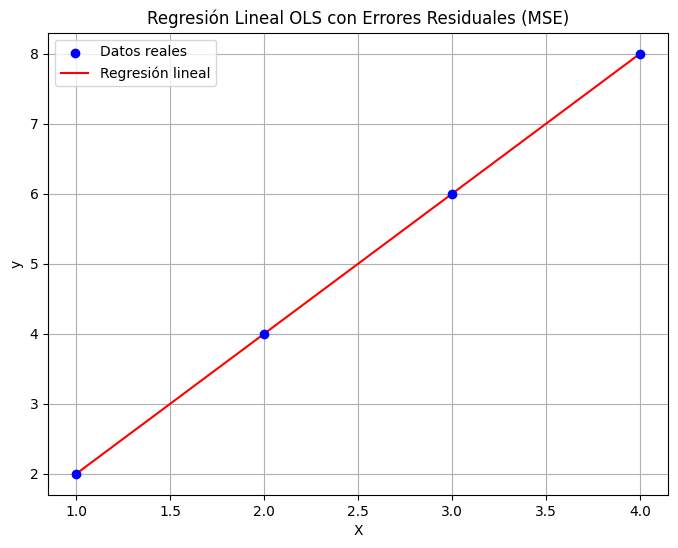

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Regresión Lineal - OLS
# =========================
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        X_bias = np.c_[np.ones(X.shape[0]), X]
        w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        self.intercept_ = w[0]
        self.coef_ = w[1:]

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.coef_ + self.intercept_
    
    def getIntercepto(self):
        return self.intercept_
    
    def getCoeficientes(self):
        return self.coef_
    
# =========================
# Dataset
# =========================
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

# =========================
# Entrenamiento
# =========================
modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

# =========================
# Errores residuales
# =========================
error_residual = y - y_pred

# =========================
# MSE
# =========================
mse = np.mean(error_residual**2)
print("MSE:", mse)

# =========================
# Gráfica
# =========================
plt.figure(figsize=(8, 6))

# Puntos reales
plt.scatter(X, y, label="Datos reales", color="blue", zorder=3)

# Recta de regresión
plt.plot(X, y_pred, label="Regresión lineal", color="red")

# Errores residuales
for i in range(len(X)):
    plt.vlines(X[i], y_pred[i], y[i], colors="gray", linestyles="dashed")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal OLS con Errores Residuales (MSE)")
plt.legend()
plt.grid(True)

plt.show()

In [7]:
modelo.getIntercepto()

np.float64(0.0)

In [8]:
modelo.getCoeficientes()

array([2.])

In [9]:
print("y_pred = {:.0f}x + {}".format(modelo.getCoeficientes()[0], modelo.getIntercepto()))

y_pred = 2x + 0.0


En OLS, el $\textit{loss function} es convexo$:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider

def widget_lr_plotly(n_points=30):
    rng = np.random.default_rng(42)

    X = rng.uniform(500, 3000, n_points)
    true_w1, true_w0 = 0.232, 246
    y = true_w1 * X + true_w0 + rng.normal(0, 60, n_points)

    # OLS
    X_design = np.c_[np.ones(n_points), X]
    w0_hat, w1_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

    # ---------- Figura izquierda (Matplotlib 2D) ----------
    plt.figure(figsize=(7,4))
    plt.scatter(X, y, facecolors='none', edgecolors='black')
    x_line = np.linspace(500, 3500, 200)
    plt.plot(x_line, w1_hat * x_line + w0_hat, 'k--', linewidth=2)
    plt.xlabel("House size in square feet")
    plt.ylabel("House price in $1000")
    plt.title("(a) Linear Regression (OLS)")
    plt.show()

    # ---------- Figura derecha (Plotly 3D rotatable) ----------
    w0_vals = np.linspace(w0_hat - 200, w0_hat + 200, 70)
    w1_vals = np.linspace(w1_hat - 0.15, w1_hat + 0.15, 70)
    W0, W1 = np.meshgrid(w0_vals, w1_vals)

    pred = W1[..., None] * X + W0[..., None]
    Loss = np.mean((pred - y)**2, axis=2)

    loss_hat = np.mean((w1_hat * X + w0_hat - y)**2)

    fig = go.Figure(data=[
        go.Surface(x=W1, y=W0, z=Loss, opacity=0.85),
        go.Scatter3d(x=[w1_hat], y=[w0_hat], z=[loss_hat],
                     mode="markers", marker=dict(size=6))
    ])

    fig.update_layout(
        title="(b) Loss Surface (MSE) — rotatable",
        scene=dict(xaxis_title="w1", yaxis_title="w0", zaxis_title="Loss"),
        height=450,
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

interact(
    widget_lr_plotly,
    n_points=IntSlider(min=10, max=200, step=5, value=30, description="Data points")
)

interactive(children=(IntSlider(value=30, description='Data points', max=200, min=10, step=5), Output()), _dom…

<function __main__.widget_lr_plotly(n_points=30)>

Hay escenarios donde tenemos un gran conjunto de datos por lo que este tipo de operación puede ser computacionalmente costosa o tenemos data parcial que necesitamos entrenar de manera progresiva, en cuyo caso conviene usar un método iterativo como Gradient Descent:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, Output

# ------------------------------------------------------------
# Definición del loss NO convexo y su gradiente
# ------------------------------------------------------------
def non_convex_loss(w0, w1):
    return np.sin(w0) * np.cos(w1) + 0.05 * (w0**2 + w1**2)

def grad_non_convex_loss(w0, w1):
    dL_dw0 = np.cos(w0) * np.cos(w1) + 0.1 * w0
    dL_dw1 = -np.sin(w0) * np.sin(w1) + 0.1 * w1
    return np.array([dL_dw0, dL_dw1])

# ------------------------------------------------------------
# Inicialización de Gradient Descent
# ------------------------------------------------------------
w = np.array([2.5, 2.5])      # punto inicial (intencionalmente lejos)
learning_rate = 0.1
trajectory = [w.copy()]

# ------------------------------------------------------------
# Grilla para visualizar el loss
# ------------------------------------------------------------
w0_vals = np.linspace(-6, 6, 200)
w1_vals = np.linspace(-6, 6, 200)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = non_convex_loss(W0, W1)

# ------------------------------------------------------------
# Visualización
# ------------------------------------------------------------
out = Output()

def plot_state():
    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(6, 6))

        # Contornos del loss
        plt.contour(W0, W1, Z, levels=40, cmap="viridis")
        plt.colorbar(label="Loss")

        traj = np.array(trajectory)

        # Trayectoria de GD
        plt.plot(traj[:, 0], traj[:, 1], 'r-o', linewidth=2, markersize=4)

        # Punto inicial y punto actual
        plt.scatter(traj[0, 0], traj[0, 1], s=80, label="Start", color="blue")
        plt.scatter(traj[-1, 0], traj[-1, 1], s=80, label="Current", color="red")

        plt.xlabel("$w_0$")
        plt.ylabel("$w_1$")
        plt.title("Non-Convex Loss — Gradient Descent (step-by-step)")
        plt.legend()
        plt.grid(True)
        plt.show()

# ------------------------------------------------------------
# Paso de Gradient Descent (botón)
# ------------------------------------------------------------
def gradient_step(_):
    global w
    grad = grad_non_convex_loss(w[0], w[1])
    w = w - learning_rate * grad
    trajectory.append(w.copy())
    plot_state()

# ------------------------------------------------------------
# Botón interactivo
# ------------------------------------------------------------
btn = Button(
    description="Next Gradient Descent Step",
    button_style="success"
)

btn.on_click(gradient_step)

# Mostrar estado inicial
plot_state()

VBox([btn, out])

# Gradient Descent en Regresión Lineal

## 1. Idea general

En **regresión lineal**, el objetivo es encontrar el vector de pesos **w** que minimiza la función de costo de mínimos cuadrados:

$$
J(\mathbf{w}) = \frac{1}{2n}\sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \mathbf{w})^2
$$

**Gradient Descent (GD)** es un **método iterativo de optimización** que ajusta los parámetros en la dirección opuesta al gradiente de la función de costo, es decir, hacia el mayor descenso del error.

---

## 2. Regla de actualización

La regla general de actualización es:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \, \nabla J(\mathbf{w}^{(t)})
$$

donde:
- $\eta$ es la **tasa de aprendizaje**,
- $\nabla J(\mathbf{w})$ es el **gradiente** de la función de costo.

Para regresión lineal con MSE:

$$
\nabla J(\mathbf{w}) = -\frac{1}{n}\mathbf{X}^\top(\mathbf{y} - \mathbf{X}\mathbf{w})
$$

---

## 3. ¿Cuándo usar Gradient Descent en vez de OLS?

La solución cerrada de **Ordinary Least Squares (OLS)** es:

$$
\mathbf{w}_{OLS} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
$$

Gradient Descent resulta más conveniente cuando:

- El número de observaciones o de variables es muy grande, haciendo costosa la inversión de matrices.
- Se requiere aprendizaje incremental u online.
- Se busca escalabilidad en contextos de Big Data.

En datasets pequeños y bien condicionados, OLS suele ser más rápido y exacto.

---

## 4. Propiedades teóricas clave

- **Convexidad**  
  En regresión lineal, la función de costo es convexa, lo que garantiza un único mínimo global.

- **Convergencia**  
  Gradient Descent converge al mínimo global si la tasa de aprendizaje es adecuadamente pequeña.

- **Dependencia del learning rate**  
  Un valor grande puede provocar divergencia; uno muy pequeño genera convergencia lenta.

- **Naturaleza iterativa**  
  A diferencia de OLS, la solución se aproxima progresivamente.

